In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('drive/MyDrive/Statistic_Final/dataset.csv')
print(df.shape)

(15703, 9)


In [ ]:
import numpy as np

df = df.dropna(subset=['Salary'])
print(df.shape)

def salary_to_numeric(salary):
  if '-' in salary:
    # taking midpoint of range
    low, high = map(lambda x: int(x.replace(',', '').replace('$', '')), salary.split('-'))
    return (low + high+1) / 2
  return 500000

df['Salary_numeric'] = df['Salary'].apply(salary_to_numeric)

df['Education Level'] = df['Education Level'].str.strip()

df['Programming_Languages'] = df['Programming_Languages'].str.split(', ')

df[['Education Level', 'Salary_numeric']].head()

(12497, 9)


<ipython-input-3-2b1c31850dcb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary_numeric'] = df['Salary'].apply(salary_to_numeric)
<ipython-input-3-2b1c31850dcb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = df['Education Level'].str.strip()
<ipython-input-3-2b1c31850dcb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,Education Level,Salary_numeric
0,Master,35000.0
1,Professional degree,6250.0
3,Master,275000.0
4,Bachelor,4500.0
5,Master,65000.0


<ipython-input-11-f61403bad90e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_salary.index, y=education_salary.values, palette="viridis")


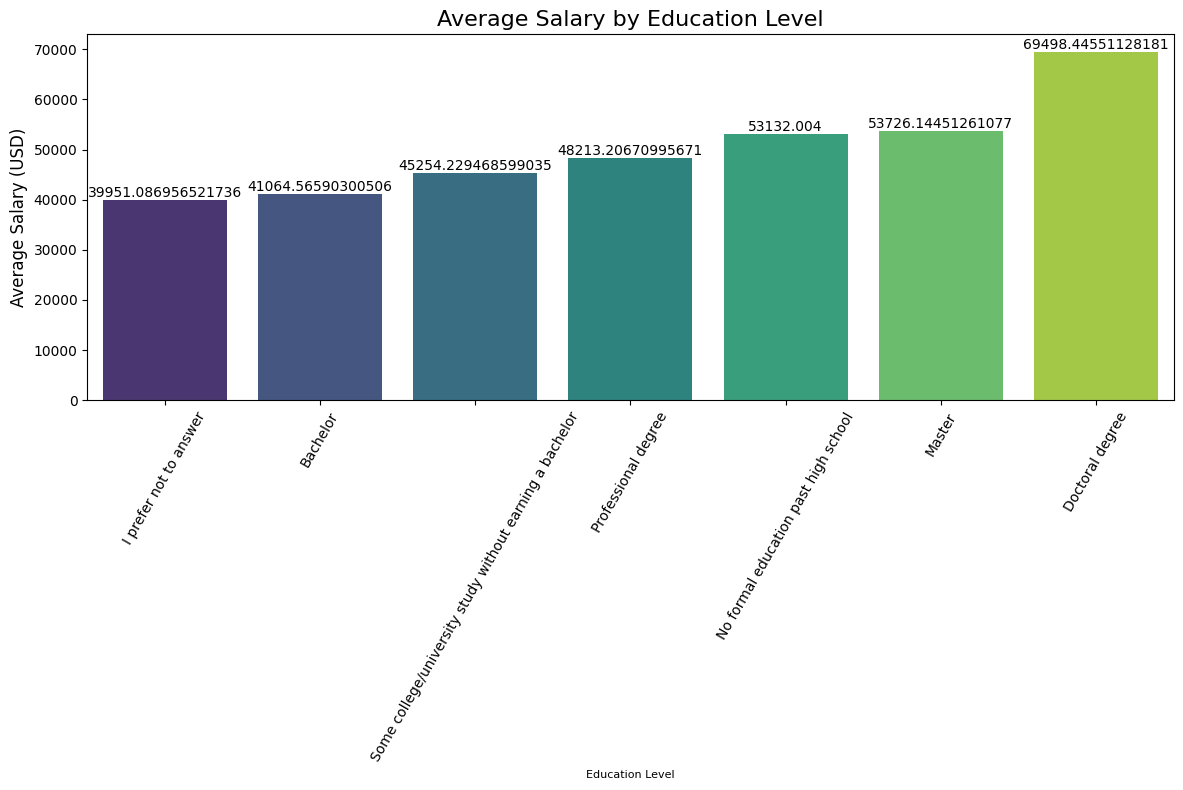

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive analysis: Education Level vs Salary
education_salary = df.groupby('Education Level')['Salary_numeric'].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=education_salary.index, y=education_salary.values, palette="viridis")
plt.title("Average Salary by Education Level", fontsize=16)
plt.xlabel("Education Level", fontsize=8)
plt.ylabel("Average Salary (USD)", fontsize=12)
plt.xticks(rotation=60)
for i, v in enumerate(education_salary.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Calculating descriptive statistics
mean_salary = df['Salary_numeric'].mean()
median_salary = df['Salary_numeric'].median()
variance_salary = df['Salary_numeric'].var()

print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Variance in Salary: {variance_salary}")


Num_Languages_Capped
0     44195.352338
1     46351.040891
2     49641.477509
3     57851.040378
4     61894.167315
5+    61170.798131
Name: Salary_numeric, dtype: float64


<ipython-input-40-af855eccb193>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_salary.index, y=language_salary.values, palette="viridis")


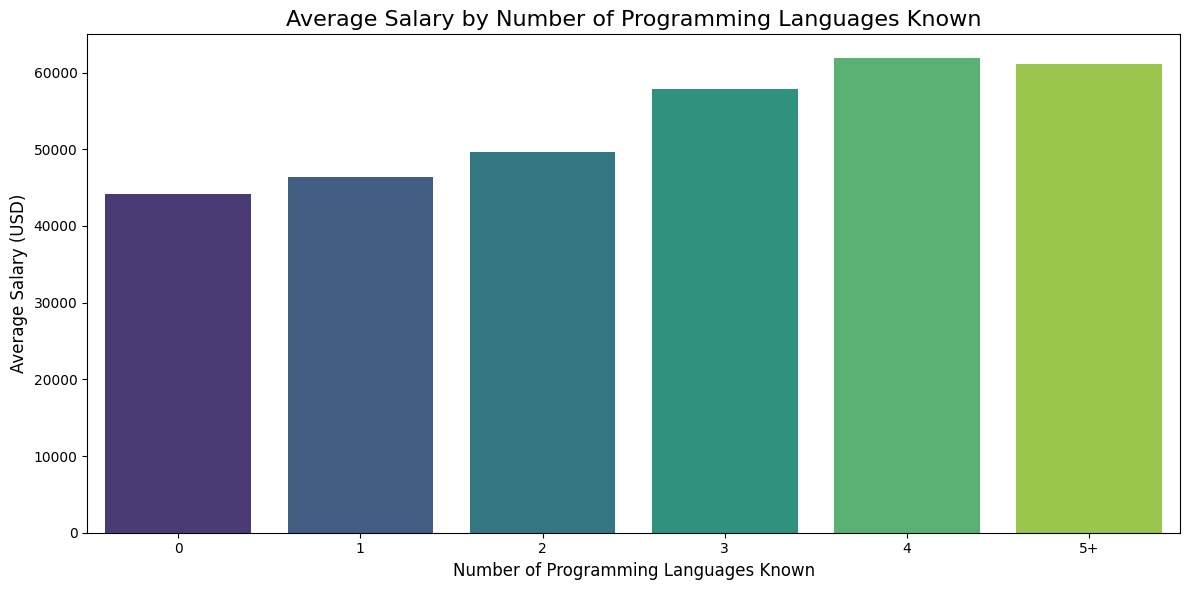

In [40]:
exploded_languages = df.explode('Programming_Languages')

df['Programming_Languages'] = df['Programming_Languages'].apply(
    lambda x: x if isinstance(x, list) else []
)

lans = df['Programming_Languages']
salaries = df['Salary_numeric'].tolist()


df['Num_Languages'] = df['Programming_Languages'].apply(len)
df['Num_Languages_Capped'] = df['Num_Languages'].apply(lambda x: x if x <= 4 else '5+')

# Step 4: Calculate average salary for each capped group and sort bins numerically
language_salary = df.groupby('Num_Languages_Capped')['Salary_numeric'].mean()

# Step 5: Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=language_salary.index, y=language_salary.values, palette="viridis")
plt.title("Average Salary by Number of Programming Languages Known", fontsize=16)
plt.xlabel("Number of Programming Languages Known", fontsize=12)
plt.ylabel("Average Salary (USD)", fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

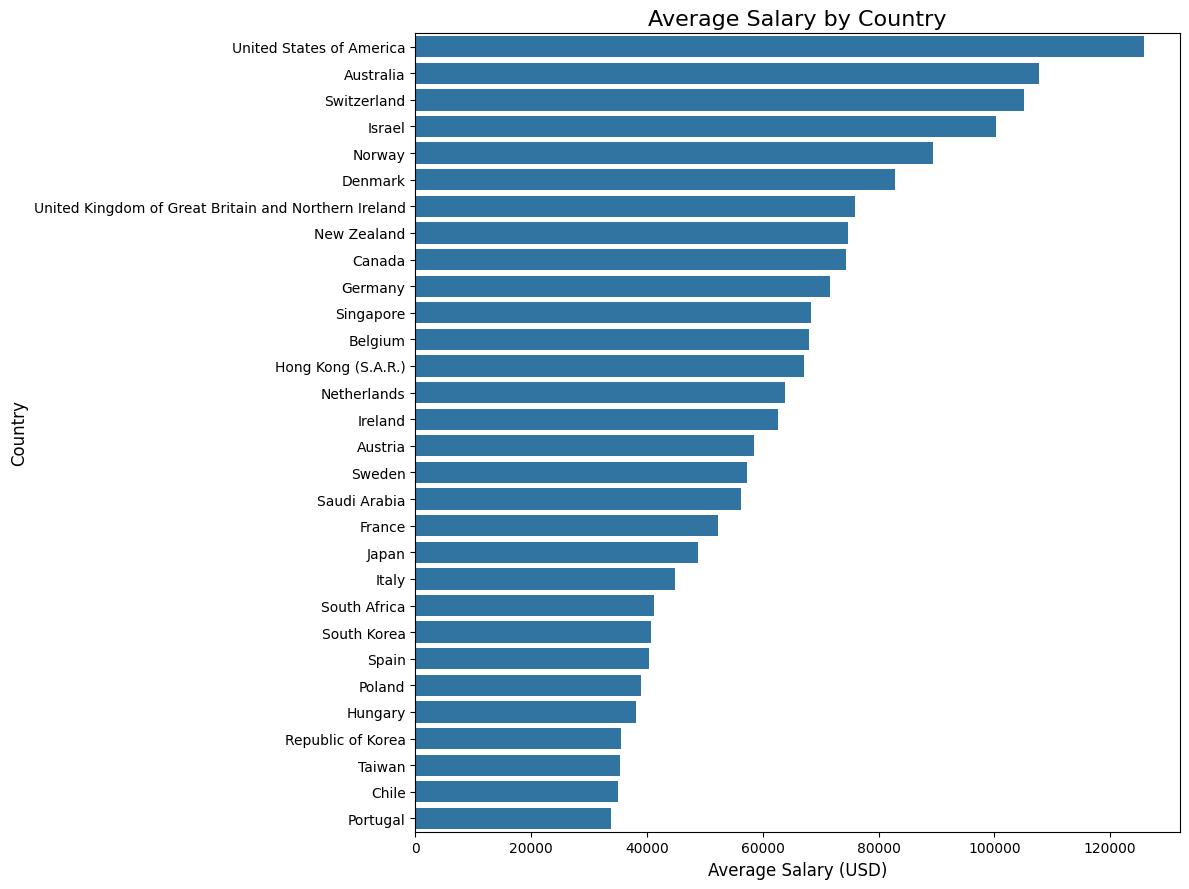

In [42]:
country_salary = df.groupby('Country')['Salary_numeric'].mean().sort_values(ascending=False)

country_salary = country_salary.head(30)

# Plotting
plt.figure(figsize=(12, 9))
sns.barplot(x=country_salary.values, y=country_salary.index)
plt.title("Average Salary by Country", fontsize=16)
plt.xlabel("Average Salary (USD)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
print(df.columns.tolist())

['Submission time', 'Age', 'Gender', 'Country', 'Education Level', 'Job', 'Company size', 'Salary', 'Programming_Languages', 'Salary_numeric']


### Q1: Does having an education level higher than a bachelor’s degree result in a salary increase?
μ1 = The mean salary for individuals with a master’s degree or higher. <br>
μ2 = The mean salary for individuals with a bachelor’s degree or lower.
##### H0: μ1 = μ2
##### Ha: μ1 > μ2

In [ ]:
education_categories = {
    'Higher Education': ['Doctoral degree', 'Master'],
    'Lower Education': ['Bachelor', 'Professional degree', 'High School']
}

high_edu = df[df['Education Level'].isin(education_categories['Higher Education'])]
high_mean = high_edu['Salary_numeric'].mean()
high_variance = high_edu['Salary_numeric'].var()

# Filter Lower Education
low_edu = df[df['Education Level'].isin(education_categories['Lower Education'])]
low_mean = low_edu['Salary_numeric'].mean()
low_variance = low_edu['Salary_numeric'].var()

print("high education level salary mean: ", high_mean)
print("high education level salary variance: ", high_variance)
print("low education level salary mean: ", low_mean)
print("low education level salary variance: ", low_variance)


high education level salary mean:  57858.166016853225
high education level salary variance:  4926568586.818986
low education level salary mean:  41928.46128694742
low education level salary variance:  4432385283.804841


#### Step1: First use F-test to test which t-test to apply.(at 5% significance level)
σ1 = The mean salary for individuals with a bachelor’s degree or lower. <br>
σ2 = The mean salary for individuals with a master’s degree or higher.
##### H0: $σ1^2$ = $σ2^2$
##### Ha: $σ1^2$ ≠ $σ2^2$

In [ ]:
print(len(high_edu))
print(len(low_edu))


7951
3823


In [ ]:
import scipy.stats as stats
alpha = 0.05
F = high_variance / low_variance
v1, v2 = len(high_edu) - 1, len(low_edu) - 1

f_upper = stats.f.ppf(1 - alpha / 2, v1, v2)
f_lower = 1 / stats.f.ppf(1 - alpha / 2, v2, v1)

print(f'F: {F}')
print(f'accept range: {f_lower} ~ {f_upper}')
print(f_upper >= F and F >= f_lower)



F: 1.1114937604408632
accept range: 0.9471478375314608 ~ 1.0563602312906089
False


### Step2: Since we do not have enough evidence to support the variance of two distribution is equal, we should use Welch's t-test.(one sided, at 5% significance level)



In [ ]:
import math
n1 = len(high_edu)
n2 = len(low_edu)
var1 = high_variance
var2 = low_variance
mean1 = high_mean
mean2 = low_mean
delta = 0
alpha = 0.05
degree_of_freedom = math.floor(((var1 / n1) + (var2 / n2)) ** 2 / ((var1 / n1) ** 2 / (n1 - 1) + (var2 / n2) ** 2 / (n2 - 1)))
t0 = (mean1 - mean2 - delta) / math.sqrt((var1 / n1) + (var2 / n2))

t_value = stats.t.ppf(1 - alpha, degree_of_freedom)
# p_value = stats.t.sf(abs(t0), degree_of_freedom) * 2
# print(degree_of_freedom, t0, t_value)
# print(t0 > t_value)
print(f"degree of freedom: {degree_of_freedom}")
print("t0: ", t0)
print("t_value: ", t_value)
print(t0 > t_value)

degree of freedom: 7912
t0:  11.943120136680323
t_value:  1.645046239269868
True


### Since t0 is larger than the critical value, we have evidence to reject H0 at alpha = 0.05 and conclude that μ1 > μ2.

### Q2: Does proficient in more than two language result in a salary increase?
μ1 = The mean salary for individuals proficient in three languages or more. <br>
μ2 = The mean salary for individuals proficient in two languages or less.
##### H0: μ1 = μ2
##### Ha: μ1 > μ2

In [ ]:
df['Programming_Languages'] = df['Programming_Languages'].apply(
    lambda x: x if isinstance(x, list) else []
)

lans = df['Programming_Languages']
salaries = df['Salary_numeric'].tolist()

print(lans.shape)


type1, type2 = [], []
sal1, sal2 = [], []
for i, lan in enumerate(lans):
  if len(lan) >= 3:
    type1.append(lan)
    sal1.append(salaries[i])

  else:
    type2.append(lan)
    sal2.append(salaries[i])
sal1, sal2 = np.array(sal1), np.array(sal2)

type1_mean = sal1.mean()
type2_mean = sal2.mean()
type1_var = sal1.var()
type2_var = sal2.var()

#type1: three or more languages
#type2: 2 or less languages
print("type1 mean: ", type1_mean)
print("type2 mean: ", type2_mean)
print("type1 variance: ", type1_var)
print("type2 variance: ", type2_var)

(12497,)
type1 mean:  59564.90380094044
type2 mean:  47211.046665764916
type1 variance:  5215053585.598015
type2 variance:  4564480840.815622


#### Step1: First use F-test to test which t-test to apply.(at 5% significance level)
σ1 = The standard deviation of salary for individuals proficient in three languages or more.<br>
σ2 = The standard deviation of salary for individuals proficient in two languages or less.
##### H0: $σ1^2$ = $σ2^2$
##### Ha: $σ1^2$ ≠ $σ2^2$

In [ ]:
import scipy.stats as stats
alpha = 0.05
F = type1_var / type2_var
v1, v2 = len(type1) - 1, len(type2) - 1

f_upper = stats.f.ppf(1 - alpha / 2, v1, v2)
f_lower = 1 / stats.f.ppf(1 - alpha / 2, v2, v1)

print(f'F : {F}')
print(f'accept range: {f_lower} ~ {f_upper}')
print(f_upper >= F and F >= f_lower)

F : 1.1425294064036737
accept range: 0.9506870925274047 ~ 1.0516222256853824
False


### Step2: Since we do not have enough evidence to support the variance of two distribution is equal, we should use Welch's t-test.(one sided, at 5% significance level)

In [ ]:
import math
n1 = len(high_edu)
n2 = len(low_edu)
var1 = type1_var
var2 = type2_var
mean1 = type1_mean
mean2 = type2_mean

delta = 0
alpha = 0.05
degree_of_freedom = math.floor(((var1 / n1) + (var2 / n2)) ** 2 / ((var1 / n1) ** 2 / (n1 - 1) + (var2 / n2) ** 2 / (n2 - 1)))
t0 = (mean1 - mean2 - delta) / math.sqrt((var1 / n1) + (var2 / n2))

t_value = stats.t.ppf(1 - alpha, degree_of_freedom)
# p_value = stats.t.sf(abs(t0), degree_of_freedom) * 2
# print(degree_of_freedom, t0, t_value)
# print(t0 > t_value)
print("degree of freedom: ", degree_of_freedom)
print("t0: ", t0)
print("t_value: ", t_value)
print(t0 > t_value)

degree of freedom:  8012
t0:  9.083100489001893
t_value:  1.6450438349422825
True


### Since t0 is larger than the critical value, we have evidence to reject H0 at alpha = 0.05 and conclude that μ1 > μ2.

### Q3: Does the mean salary vary in different continents ?
μ1 = The mean salary for individuals in Europe. <br>
μ2 = The mean salary for individuals in Asia. <br>
μ3 = The mean salary for individuals in America. <br>
μ4 = The mean salary for individuals in Africa.
##### H0: μ1 = μ2 = μ3 = μ4
##### Ha: At least one mean salary of a continent is different.

In [ ]:
import scipy.stats as stats
Europe=['France', 'Germany','Netherlands','Ireland','Greece','Ukraine','Belarus','United Kingdom of Great Britain and Northern Ireland','Sweden','Portugal'
,'Poland','Italy','Czech Republic','Spain','Hungary','Norway','Switzerland','Denmark','Romania','Belgium','Austria']
Asia=['India','Australia','Russia','Pakistan','Japan','South Korea','Indonesia','Hong Kong (S.A.R.)','Turkey','Singapore','Israel','Taiwan','Bangladesh','Thailand','China'
,'Viet Nam','Republic of Korea','New Zealand','Malaysia','Philippines','Saudi Arabia','Iran, Islamic Republic of...']
America=['United States of America','Brazil','Mexico','Canada','Chile','Argentina','Colombia','Peru']
Africa=['Nigeria','Morocco','South Africa','Egypt','Tunisia','Kenya','Algeria']
Others = ['Other']

all = Europe + Asia + America + Africa + Others

df_europe = df[df['Country'].isin(Europe)]
df_asia = df[df['Country'].isin(Asia)]
df_america = df[df['Country'].isin(America)]
df_africa = df[df['Country'].isin(Africa)]

mean_df_europe = df_europe['Salary_numeric'].mean()
mean_df_asia = df_asia['Salary_numeric'].mean()
mean_df_america = df_america['Salary_numeric'].mean()
mean_df_africa = df_africa['Salary_numeric'].mean()
var_df_europe = df_europe['Salary_numeric'].var()
var_df_asia = df_asia['Salary_numeric'].var()
var_df_america = df_america['Salary_numeric'].var()
var_df_africa = df_africa['Salary_numeric'].var()

print(f"mean : EU:{mean_df_europe} AS:{mean_df_asia} AME:{mean_df_america} AF:{mean_df_africa}")
print(f"var :  EU:{var_df_europe} AS:{var_df_asia} AME:{var_df_america} AF:{var_df_africa}")

mean_all = sum(df[df['Country'] != 'Other']['Salary_numeric']) / len(df[df['Country'] != 'Other'])

SSE = (df_europe.shape[0] - 1) * var_df_europe + (df_asia.shape[0] - 1) * var_df_asia + (df_america.shape[0] - 1) * var_df_america
SST = (mean_df_europe - mean_all) ** 2 * df_europe.shape[0] + (mean_df_asia - mean_all) ** 2 * df_asia.shape[0] + (mean_df_america - mean_all) ** 2 * df_america.shape[0]
dft = 3
dfe = len(df_europe) + len(df_asia) + len(df_america) + len(df_africa) - 4

alpha = 0.05
MST = SST / dft
MSE = SSE / dfe
F = MST / MSE
f_critical = stats.f.ppf(1 - alpha, dft, dfe)

print(f"F value :{F} critical_value :{f_critical}")
print(F > f_critical)

# df_other = df[df['Country'] == 'Other']

# print(df_europe.shape[0] + df_asia.shape[0] + df_america.shape[0] + df_africa.shape[0] + df_other.shape[0])

# countries = df['Country'].unique()
# print(countries)
# valid = [False] * 59
# print(len(valid))
# for i, country in enumerate(countries):
#   if country in all:
#     valid[i] = True
#   else:
#     print(country)
# print(sum(valid))

mean : EU:54730.28720525705 AS:31201.7107398107 AME:91917.66180294713 AF:15776.455026455027
var :  EU:2625423121.116806 AS:3192872507.100496 AME:7278473547.945596 AF:1707493335.997532
F value :622.9168378377203 critical_value :2.605662391789357
True


### Since F is larger than the critical value, we have evidence to reject H0 at
alpha = 0.05 and conclude that at least one mean salary of a continent is different.

### Bonferroni Method
μ1 = The mean salary for individuals in Europe. <br>
μ2 = The mean salary for individuals in Asia. <br>
μ3 = The mean salary for individuals in America. <br>
μ4 = The mean salary for individuals in Africa.
##### H0: μ1 = μ2
##### H1: μ1 = μ3
##### H2: μ1 = μ4
##### H3: μ2 = μ3
##### H4: μ2 = μ4
##### H5: μ3 = μ4

In [ ]:
import math
from scipy.stats import t


alpha = 0.05


n1 = df_europe.shape[0]
n2 = df_asia.shape[0]
n3 = df_america.shape[0]
n4 = df_africa.shape[0]
dfe = n1 + n2 + n3 + n4 - 4

Sp = math.sqrt(MSE)
t_value = t.ppf(1 - alpha / (2 * 6), dfe)

#europe compare to asia
H0_interval_lower = mean_df_europe - mean_df_asia - t_value * Sp * math.sqrt(1 / n1 + 1 / n2)
H0_interval_upper = mean_df_europe - mean_df_asia + t_value * Sp * math.sqrt(1 / n1 + 1 / n2)
print(f'H0 interval: {H0_interval_lower} ~ {H0_interval_upper}')
#europe compare to america
H1_interval_lower = mean_df_europe - mean_df_america - t_value * Sp * math.sqrt(1 / n1 + 1 / n3)
H1_interval_upper = mean_df_europe - mean_df_america + t_value * Sp * math.sqrt(1 / n1 + 1 / n3)
print(f'H1 interval: {H1_interval_lower} ~ {H1_interval_upper}')
#europe compare to africa
H2_interval_lower = mean_df_europe - mean_df_africa - t_value * Sp * math.sqrt(1 / n1 + 1 / n4)
H2_interval_upper = mean_df_europe - mean_df_africa + t_value * Sp * math.sqrt(1 / n1 + 1 / n4)
print(f'H2 interval: {H2_interval_lower} ~ {H2_interval_upper}')
#asia compare to america
H3_interval_lower = mean_df_asia - mean_df_america - t_value * Sp * math.sqrt(1 / n2 + 1 / n3)
H3_interval_upper = mean_df_asia - mean_df_america + t_value * Sp * math.sqrt(1 / n2 + 1 / n3)
print(f'H3 interval: {H3_interval_lower} ~ {H3_interval_upper}')
#asia compare to africa
H4_interval_lower = mean_df_asia - mean_df_africa - t_value * Sp * math.sqrt(1 / n2 + 1 / n4)
H4_interval_upper = mean_df_asia - mean_df_africa + t_value * Sp * math.sqrt(1 / n2 + 1 / n4)
print(f'H4 interval: {H4_interval_lower} ~ {H4_interval_upper}')
#america compare to africa
H5_interval_lower = mean_df_america - mean_df_africa - t_value * Sp * math.sqrt(1 / n3 + 1 / n4)
H5_interval_upper = mean_df_america - mean_df_africa + t_value * Sp * math.sqrt(1 / n3 + 1 / n4)
print(f'H5 interval: {H5_interval_lower} ~ {H5_interval_upper}')

H0 interval: 19453.43181964929 ~ 27603.721111243416
H1 interval: -41586.27814194457 ~ -32788.47105343558
H2 interval: 31105.47675127508 ~ 46802.18760632897
H3 interval: -64432.19556504162 ~ -56999.70656123123
H4 interval: 7938.146543383758 ~ 22912.364883327587
H5 interval: 68473.06800423688 ~ 83809.34554874731


### As a result, we have evidence that μ1 ≠ μ2, μ1 ≠ μ3, μ1 ≠ μ4, μ2 ≠ μ3, μ2 ≠ μ4, μ3 ≠ μ4.